# Clustering
Here we will observe how to cluster our data both based on spatial relationships and attribute values (and then both together).

In [ ]:
from sklearn.cluster import KMeans  # for clustering
import geopandas as gpd  # for data manipulation

In [2]:
pluto = gpd.read_file("../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

## Cluster based on attribute data

In [3]:
# get clusters using kmeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pluto[["NumFloors", "ResArea"]])

pluto["NumFloorsCluster"] = kmeans.predict(pluto[["NumFloors", "ResArea"]])

In [4]:
pluto.groupby("NumFloorsCluster").NumFloors.describe().sort_values("max")

,count,mean,std,min,25%,50%,75%,max
NumFloorsCluster,,,,,,,,
2,5.0,18.600000,8.264381,13.0,14.0,15.0,18.0,33.0
4,1.0,33.000000,NaN,33.0,33.0,33.0,33.0,33.0
3,5580.0,12.516174,9.462652,0.0,6.0,9.0,16.0,82.0
1,469.0,24.384861,16.606995,0.0,13.0,20.0,33.0,98.0
0,850764.0,2.278651,1.545119,0.0,2.0,2.0,2.5,104.0


<Axes: xlabel='NumFloors', ylabel='ResArea'>

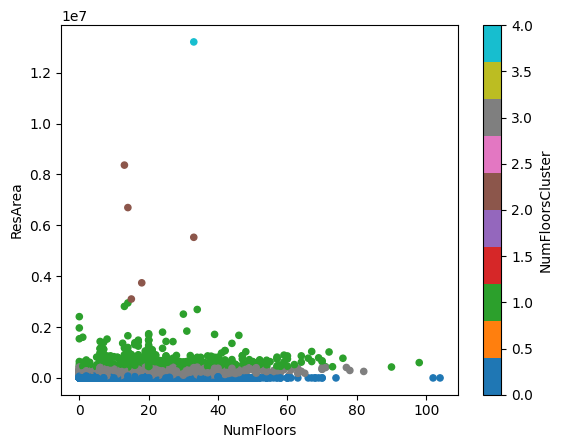

In [5]:
pluto.plot.scatter(x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10")

<Axes: xlabel='NumFloors', ylabel='ResArea'>

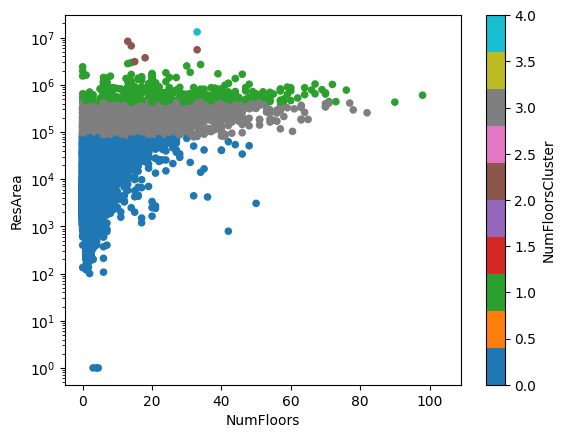

In [6]:
# same as above but with log y axis instead of linear to be able to see the clusters better
pluto.plot.scatter(
    x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10", logy=True
)

<Axes: ylabel='Frequency'>

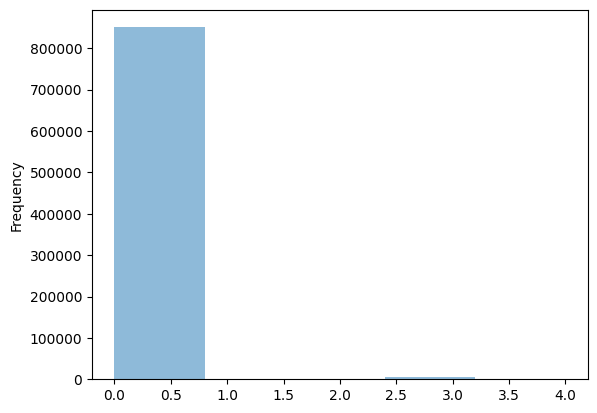

In [7]:
pluto["NumFloorsCluster"].plot.hist(bins=5, alpha=0.5)

> ## Question: 
> 🧐 What does the shape of the clusters tell us about the data (and the relationship between buildings in NYC, residential area, and number of floors)?

## Cluster based on spatial relationships